# Lecture 9, Model Evaluation

## Classification and Regression Metrics

In [26]:
import numpy as np

def confusion_matrix(y_true, y_pred):
    unique_classes = np.unique(np.concatenate((y_true, y_pred)))
    cm = np.zeros((len(unique_classes), len(unique_classes)), dtype=int)
    for i, true_label in enumerate(unique_classes):
        for j, pred_label in enumerate(unique_classes):
            cm[i, j] = np.sum((y_true == true_label) & (y_pred == pred_label))
    return cm

def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision_score(y_true, y_pred, average='binary'):
    cm = confusion_matrix(y_true, y_pred)
    if average == 'binary':
        precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    else:
        precision = np.diag(cm) / np.sum(cm, axis=0)
        if average == 'micro':
            precision = np.sum(np.diag(cm)) / np.sum(cm)
        elif average == 'macro':
            precision = np.mean(precision)
        elif average == 'weighted':
            weights = np.sum(cm, axis=1) / np.sum(cm)
            precision = np.sum(precision * weights)
    return precision

def recall_score(y_true, y_pred, average='binary'):
    cm = confusion_matrix(y_true, y_pred)
    if average == 'binary':
        recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    else:
        recall = np.diag(cm) / np.sum(cm, axis=1)
        if average == 'micro':
            recall = np.sum(np.diag(cm)) / np.sum(cm)
        elif average == 'macro':
            recall = np.mean(recall)
        elif average == 'weighted':
            weights = np.sum(cm, axis=1) / np.sum(cm)
            recall = np.sum(recall * weights)
    return recall

def fbeta_score(y_true, y_pred, beta=1, average='binary'):
    precision = precision_score(y_true, y_pred, average)
    recall = recall_score(y_true, y_pred, average)
    return (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def adjusted_r2_score(y_true, y_pred, p):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_true_class = np.array([0, 1, 2, 0, 1, 2])
y_pred_class = np.array([0, 2, 1, 0, 1, 1])

y_true_reg = np.array([3.0, -0.5, 2.0, 7.0])
y_pred_reg = np.array([2.5, 0.0, 2.0, 8.0])

print("Confusion Matrix:")
print(confusion_matrix(y_true_class, y_pred_class))
print("Accuracy:", accuracy_score(y_true_class, y_pred_class))
print("Precision (Micro):", precision_score(y_true_class, y_pred_class, average='micro'))
print("Precision (Macro):", precision_score(y_true_class, y_pred_class, average='macro'))
print("Precision (Weighted):", precision_score(y_true_class, y_pred_class, average='weighted'))
print("Recall (Micro):", recall_score(y_true_class, y_pred_class, average='micro'))
print("Recall (Macro):", recall_score(y_true_class, y_pred_class, average='macro'))
print("Recall (Weighted):", recall_score(y_true_class, y_pred_class, average='weighted'))
print("F1 Score (Micro):", fbeta_score(y_true_class, y_pred_class, beta=1, average='micro'))
print("F1 Score (Macro):", fbeta_score(y_true_class, y_pred_class, beta=1, average='macro'))
print("F1 Score (Weighted):", fbeta_score(y_true_class, y_pred_class, beta=1, average='weighted'))

print("\nRegression Metrics:")
print("MSE:", mean_squared_error(y_true_reg, y_pred_reg))
print("MAE:", mean_absolute_error(y_true_reg, y_pred_reg))
print("RMSE:", root_mean_squared_error(y_true_reg, y_pred_reg))
print("R-squared:", r2_score(y_true_reg, y_pred_reg))
print("Adjusted R-squared:", adjusted_r2_score(y_true_reg, y_pred_reg, p=1))
print("MAPE:", mean_absolute_percentage_error(y_true_reg, y_pred_reg))

Confusion Matrix:
[[2 0 0]
 [0 1 1]
 [0 2 0]]
Accuracy: 0.5
Precision (Micro): 0.5
Precision (Macro): 0.4444444444444444
Precision (Weighted): 0.4444444444444444
Recall (Micro): 0.5
Recall (Macro): 0.5
Recall (Weighted): 0.5
F1 Score (Micro): 0.5
F1 Score (Macro): 0.47058823529411764
F1 Score (Weighted): 0.47058823529411764

Regression Metrics:
MSE: 0.375
MAE: 0.5
RMSE: 0.6123724356957945
R-squared: 0.9486081370449679
Adjusted R-squared: 0.9229122055674519
MAPE: 32.73809523809524


## Threshold analysis, binary classification

Step 1: Constructing the Gradient Boosting Classifier
Default parameters:
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

Step 2: Training the model

Step 3: Making predictions and validating
Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[40  3]
 [ 2 69]]

Step 4: T

/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


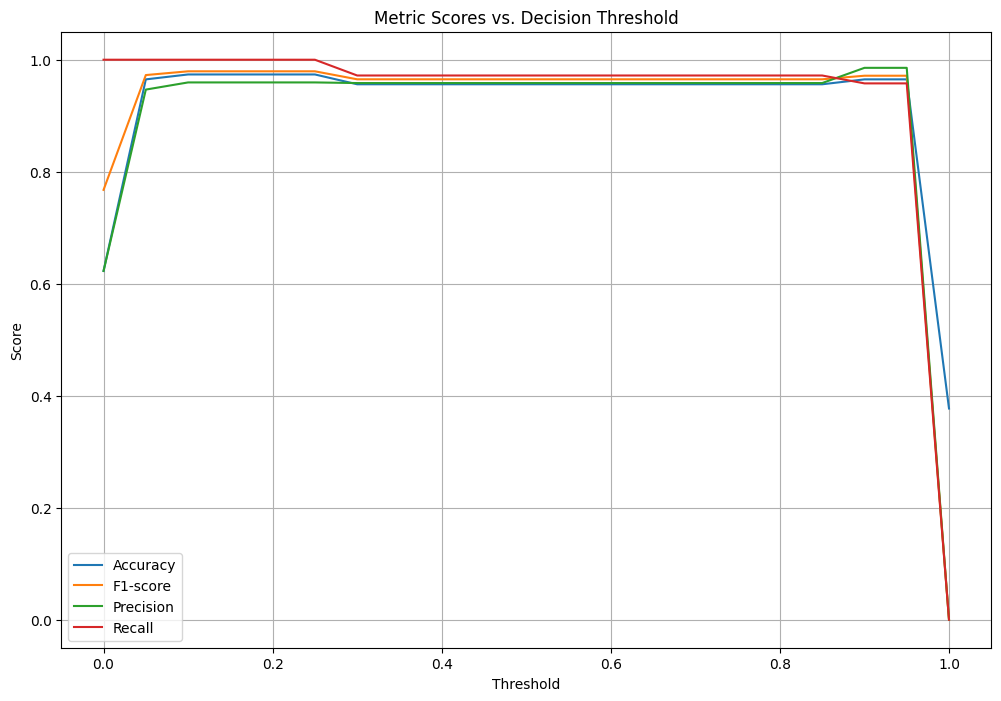


Best threshold (maximizing F1-score): 0.10
F1-score at best threshold: 0.9793

Metrics at best threshold:
Accuracy: 0.9737
Precision: 0.9595
Recall: 1.0000

Updated Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Updated Confusion Matrix:
[[40  3]
 [ 0 71]]


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Construct the Gradient Boosting Classifier
print("Step 1: Constructing the Gradient Boosting Classifier")
gb_clf = GradientBoostingClassifier(random_state=42)

# Display default parameters
print("Default parameters:")
print(gb_clf.get_params())

# Step 2: Train the model
print("\nStep 2: Training the model")
gb_clf.fit(X_train, y_train)

# Step 3: Make predictions and validate
print("\nStep 3: Making predictions and validating")
y_pred = gb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 4: Threshold analysis
print("\nStep 4: Threshold analysis")

# Get probability predictions
y_pred_proba = gb_clf.predict_proba(X_test)[:, 1]

# Initialize lists to store metrics
thresholds = np.arange(0, 1.05, 0.05)
accuracies = []
f1_scores = []
precisions = []
recalls = []

# Calculate metrics for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    accuracies.append(accuracy_score(y_test, y_pred_threshold))
    f1_scores.append(f1_score(y_test, y_pred_threshold))
    precisions.append(precision_score(y_test, y_pred_threshold))
    recalls.append(recall_score(y_test, y_pred_threshold))

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(thresholds, accuracies, label='Accuracy')
plt.plot(thresholds, f1_scores, label='F1-score')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metric Scores vs. Decision Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Find the threshold that maximizes F1-score
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
print(f"\nBest threshold (maximizing F1-score): {best_threshold:.2f}")
print(f"F1-score at best threshold: {f1_scores[best_threshold_index]:.4f}")

# Recalculate predictions and metrics using the best threshold
y_pred_best = (y_pred_proba >= best_threshold).astype(int)
print("\nMetrics at best threshold:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")

print("\nUpdated Classification Report:")
print(classification_report(y_test, y_pred_best))

print("\nUpdated Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

## Bias Variance

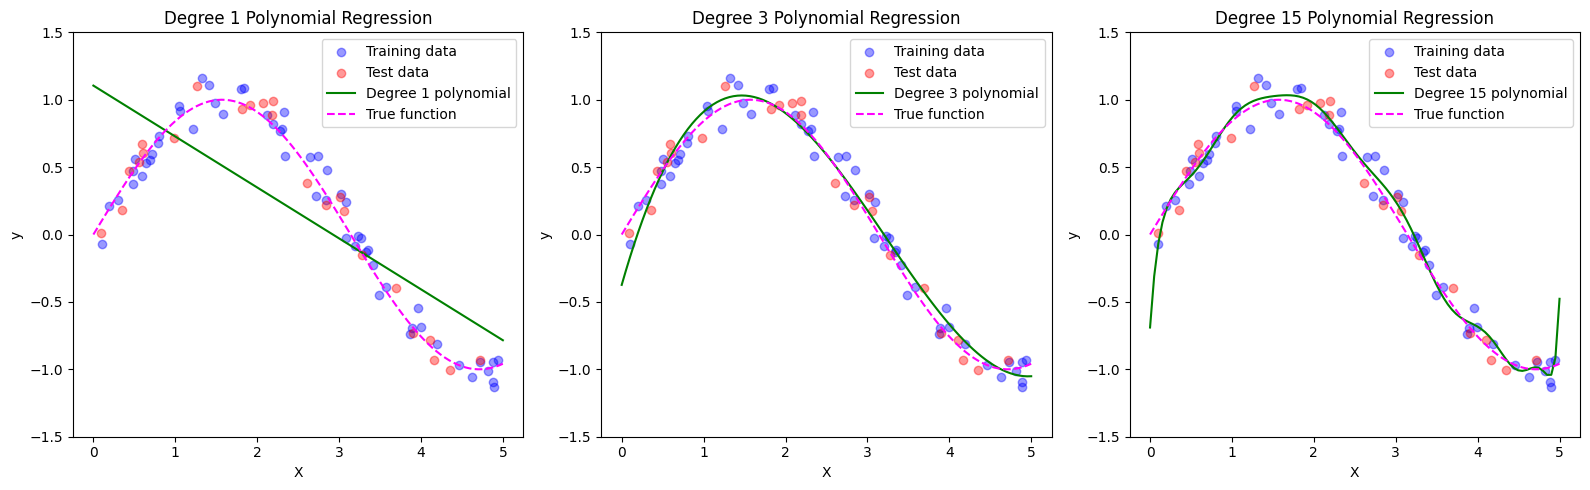

Mean Squared Error (MSE) on test set:
Degree 1: 0.2223
Degree 3: 0.0116
Degree 15: 0.0113


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create models with different degrees of complexity
degrees = [1, 3, 15]
models = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_poly, y_train)
    models.append((degree, model, poly_features))

# Plotting
plt.figure(figsize=(16, 5))

for i, (degree, model, poly_features) in enumerate(models):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train, y_train, color='blue', alpha=0.4, label='Training data')
    plt.scatter(X_test, y_test, color='red', alpha=0.4, label='Test data')
    
    # Generate points for smooth curve
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    X_plot_poly = poly_features.transform(X_plot)
    y_plot = model.predict(X_plot_poly)
    
    plt.plot(X_plot, y_plot, color='green', label=f'Degree {degree} polynomial')
    plt.plot(X_plot, np.sin(X_plot), color='magenta', linestyle='--', label='True function')
    
    plt.title(f'Degree {degree} Polynomial Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.ylim(-1.5, 1.5)
    plt.legend()

plt.tight_layout()
plt.show()

# Calculate and print MSE for each model
print("Mean Squared Error (MSE) on test set:")
for degree, model, poly_features in models:
    X_test_poly = poly_features.transform(X_test)
    y_pred = model.predict(X_test_poly)
    mse = np.mean((y_test - y_pred) ** 2)
    print(f"Degree {degree}: {mse:.4f}")

## K-Fold CV

Single Train-Test Split Results:
Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


3-Fold Cross-Validation Results:
Accuracy scores: [0.95263158 0.97368421 0.95767196]
Mean accuracy: 0.9613
Standard deviation: 0.0090

5-Fold Cross-Validation Results:
Accuracy scores: [0.95614035 0.98245614 0.94736842 0.97368421 0.94690265]
Mean accuracy: 0.9613
Standard deviation: 0.0143

10-Fold Cross-Validation Results:
Accuracy scores: [0.96491228 0.96491228 0.98245614 1.         0.96491228 0.92982456
 1.         0.98245614 0.96491228 0.92857143]
Mean accuracy: 0.9683
Standard deviation: 0.0235

Final Model Feature Importance:
                 feature  importance
20          worst radiu

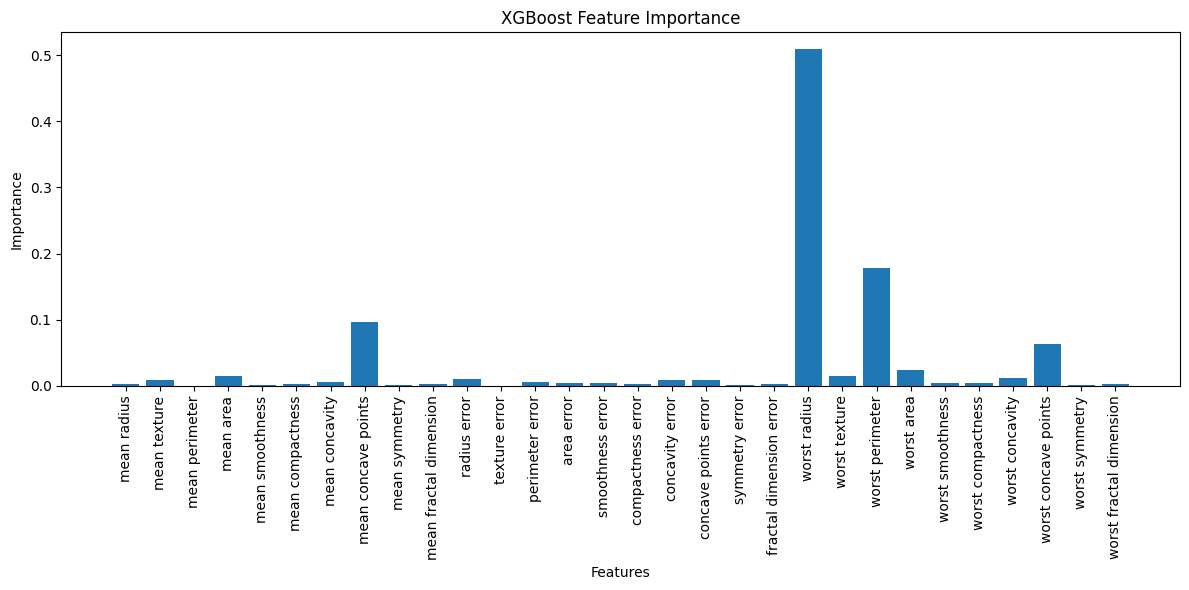

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Define the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Function to train and evaluate the model with a single train-test split
def single_train_test_split(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    model = XGBClassifier(eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Single Train-Test Split Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return accuracy

# Function to perform k-fold cross-validation
def perform_cross_validation(X, y, k=5):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(xgb_model, X, y, cv=kfold, scoring='accuracy')
    
    print(f"\n{k}-Fold Cross-Validation Results:")
    print(f"Accuracy scores: {scores}")
    print(f"Mean accuracy: {np.mean(scores):.4f}")
    print(f"Standard deviation: {np.std(scores):.4f}")
    
    return scores

# Perform single train-test split
single_split_accuracy = single_train_test_split(X, y)

# Perform k-fold cross-validation
k_values = [3, 5, 10]
cv_results = []

for k in k_values:
    cv_scores = perform_cross_validation(X, y, k)
    cv_results.append(cv_scores)

# Train final model using all data
final_model = XGBClassifier(eval_metric='logloss', random_state=42)
final_model.fit(X, y)

print("\nFinal Model Feature Importance:")
feature_importance = pd.DataFrame({
    'feature': cancer.feature_names,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(final_model.feature_importances_)), final_model.feature_importances_)
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=90)
plt.title('XGBoost Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [3]:
cv_results

[array([0.95263158, 0.97368421, 0.95767196]),
 array([0.95614035, 0.98245614, 0.94736842, 0.97368421, 0.94690265]),
 array([0.96491228, 0.96491228, 0.98245614, 1.        , 0.96491228,
        0.92982456, 1.        , 0.98245614, 0.96491228, 0.92857143])]